# Logistic Regression _ TIPS

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
df = sns.load_dataset('tips')

In [6]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
avg_bill = df['total_bill'].mean()

In [8]:
avg_bill

19.78594262295082

In [9]:
avg_tip = df['tip'].mean()

In [10]:
avg_tip

2.99827868852459

In [14]:
df['total_bill'].groupby(df['sex']).sum() / df['tip'].groupby(df['sex']).mean()

sex
Male      1054.117426
Female     554.430449
dtype: float64

In [16]:
df['total_bill'].sum() / df['tip'].sum()

6.599100576833703

<Axes: >

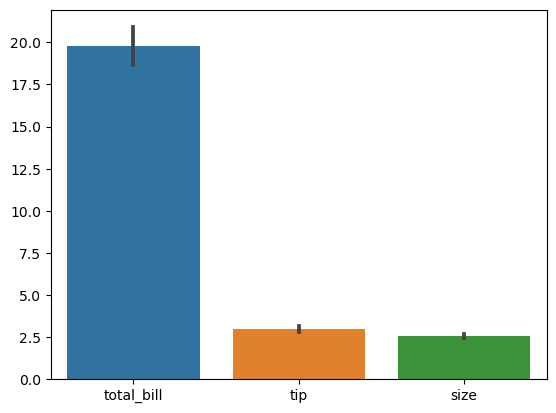

In [17]:
sns.barplot(data=df)

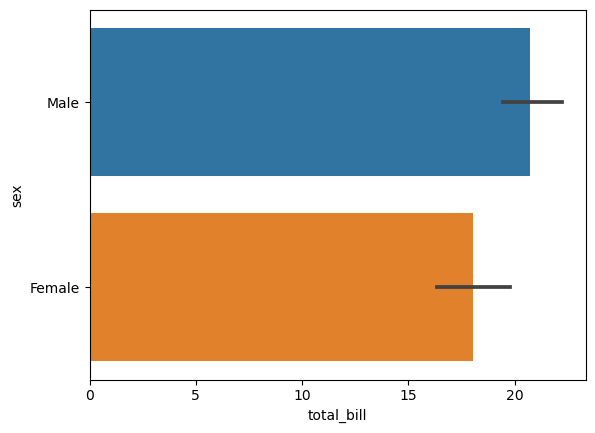

In [25]:
sns.barplot(x=df['total_bill'], y=df['sex'])
plt.show()

<Axes: >

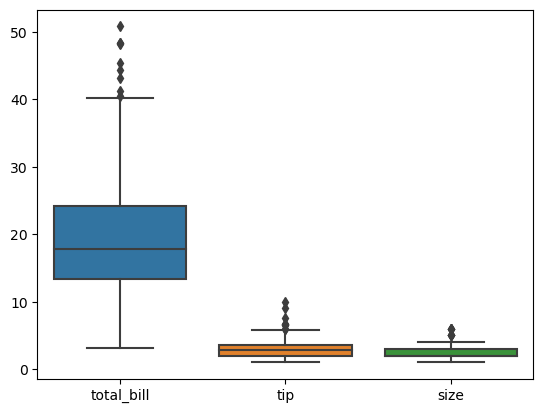

In [26]:
sns.boxplot(data=df)

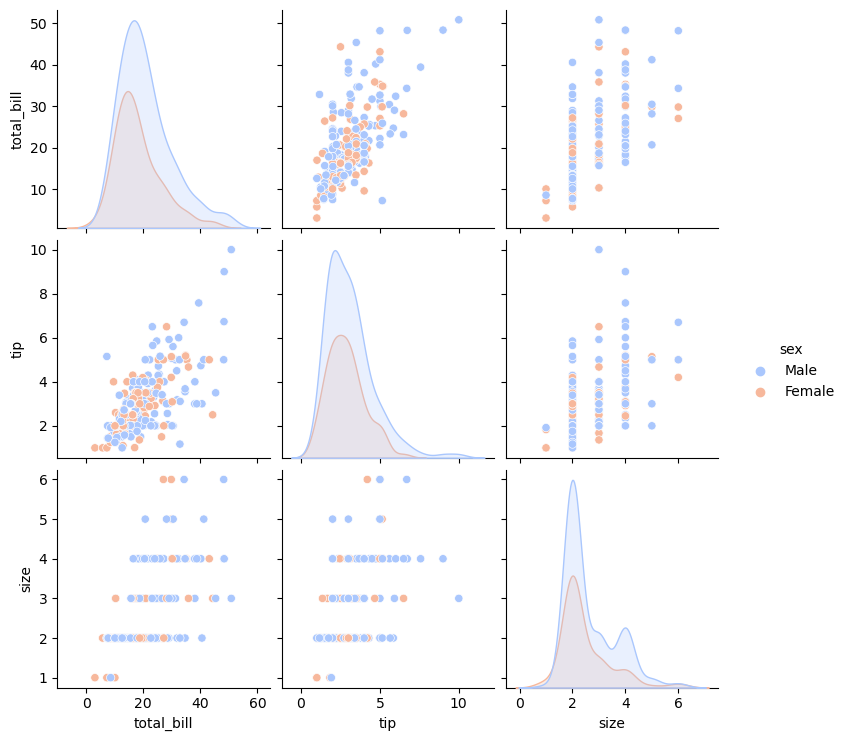

In [29]:
sns.pairplot(data=df, hue='sex', palette='coolwarm')
plt.show()

/var/folders/8c/20t35gwd03j9m2lldclbwr6c0000gn/T/ipykernel_81270/1380117854.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'], kde=False, bins=30)


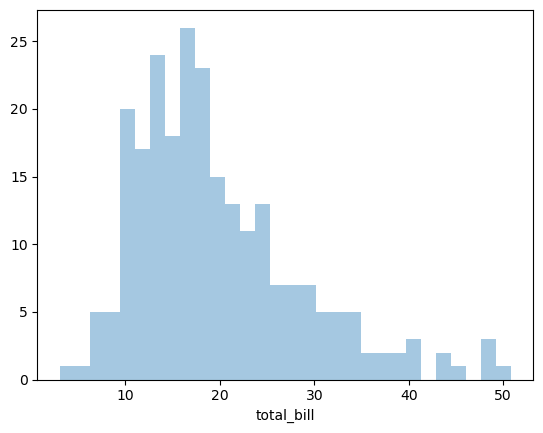

In [35]:
sns.distplot(df['total_bill'], kde=False, bins=30)
plt.show()

/var/folders/8c/20t35gwd03j9m2lldclbwr6c0000gn/T/ipykernel_81270/1109662050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tip'])


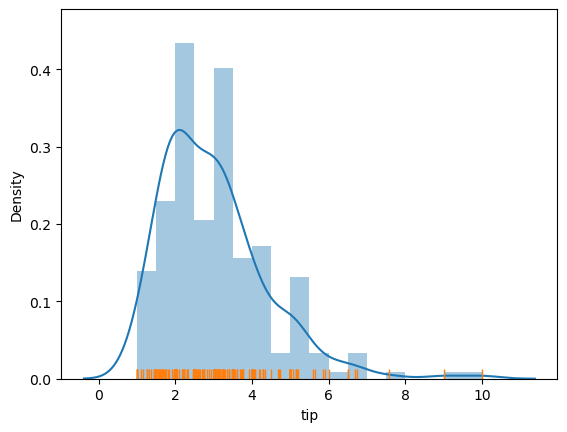

In [39]:
sns.distplot(df['tip'])
sns.rugplot(df['tip'])
plt.show()

In [41]:
df['sex'].value_counts() 

Male      157
Female     87
Name: sex, dtype: int64

In [42]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [44]:
df['sex'].groupby(df['smoker']).value_counts()

smoker  sex   
Yes     Male      60
        Female    33
No      Male      97
        Female    54
Name: sex, dtype: int64

In [52]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,NaN,No,Sun,Dinner,2
1,10.34,1.66,NaN,No,Sun,Dinner,3
2,21.01,3.50,NaN,No,Sun,Dinner,3
3,23.68,3.31,NaN,No,Sun,Dinner,2
4,24.59,3.61,NaN,No,Sun,Dinner,4


In [50]:
df.sex = df.sex.map({'Male':0 , 'Female':1})

In [51]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,NaN,No,Sun,Dinner,2
1,10.34,1.66,NaN,No,Sun,Dinner,3
2,21.01,3.50,NaN,No,Sun,Dinner,3
3,23.68,3.31,NaN,No,Sun,Dinner,2
4,24.59,3.61,NaN,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,NaN,No,Sat,Dinner,3
240,27.18,2.00,NaN,Yes,Sat,Dinner,2
241,22.67,2.00,NaN,Yes,Sat,Dinner,2
242,17.82,1.75,NaN,No,Sat,Dinner,2


In [53]:
df.drop(columns=['sex'], inplace=True)

In [54]:
df

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
label_encoder = LabelEncoder()

In [57]:
col_list = list(df.columns)

In [58]:
col_list

['total_bill', 'tip', 'smoker', 'day', 'time', 'size']

In [60]:
col_list = df.columns

for col in col_list:
    print(col)

total_bill
tip
smoker
day
time
size


In [64]:
columns = ['smoker', 'day','time','total_bill','tip']

df[columns] = df[columns].apply(lambda col :label_encoder.fit_transform(col) )

In [65]:
df

,total_bill,tip,smoker,day,time,size
0,102,1,0,2,0,2
1,21,18,0,2,0,3
2,147,83,0,2,0,3
3,163,77,0,2,0,2
4,171,87,0,2,0,4
...,...,...,...,...,...,...
239,193,115,0,1,0,3
240,185,31,1,1,0,2
241,156,31,1,1,0,2
242,113,23,0,1,0,2


In [66]:
x = df.drop(columns='smoker')

In [67]:
x

,total_bill,tip,day,time,size
0,102,1,2,0,2
1,21,18,2,0,3
2,147,83,2,0,3
3,163,77,2,0,2
4,171,87,2,0,4
...,...,...,...,...,...
239,193,115,1,0,3
240,185,31,1,0,2
241,156,31,1,0,2
242,113,23,1,0,2


In [68]:
y = df['smoker']

In [69]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    1
241    1
242    0
243    0
Name: smoker, Length: 244, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [71]:
x_train , x_test , y_train , y_test =train_test_split(x,y , test_size=0.2, random_state=42)

In [72]:
model = LogisticRegression()

In [73]:
model.fit(x_train , y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(x_test)

In [75]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [76]:
ac = accuracy_score(y_pred , y_test)

In [77]:
ac

0.6938775510204082

In [78]:
confu_mat = confusion_matrix(y_pred , y_test)

In [79]:
clas_re = classification_report(y_pred , y_test)

In [82]:
print("accuracy_score: ", ac)
print("confustion_matrix: ", confu_mat)

print("classification_report: ", clas_re)

accuracy_score:  0.6938775510204082
confustion_matrix:  [[29 13]
 [ 2  5]]
classification_report:                precision    recall  f1-score   support

           0       0.94      0.69      0.79        42
           1       0.28      0.71      0.40         7

    accuracy                           0.69        49
   macro avg       0.61      0.70      0.60        49
weighted avg       0.84      0.69      0.74        49

